In [ ]:
import sys
!{sys.executable} -m pip install pythainlp
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install attacut

In [27]:
from pythainlp import sent_tokenize, word_tokenize
import multidict as multidict
import re
import pythainlp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [28]:
text = """
พี่น้องประชาชนที่รักทุกท่าน
สถานการณ์การแพร่ระบาดของโรคติดเชื้อโควิด-19 ในวันนี้ มีอัตราการติดเชื้อทั่วโลกประมาณ 
8 แสนคน และยังมีแนวโน้มที่จะอยู่ในอัตราที่สูงอยู่ องค์การอนามัยโลกก็ได้เตือนว่าจะเกิดวิกฤตการแพร่ระบาดของโควิด-19 ทั่วโลกอีกรอบ ส่งผลให้จะเกิดการช่วงชิงทรัพยากรเพื่อใช้ในการรักษาทั่วโลก
สำหรับประเทศไทยและประชาชนชาวไทย นับเป็นพระมหากรุณาธิคุณ ที่พระบาทสมเด็จ
พระเจ้าอยู่หัวและสมเด็จพระนางเจ้าฯ พระบรมราชินี ได้พระราชทาน อุปกรณ์ทางการแพทย์ อาทิ รถเก็บตัวอย่างชีวนิรภัย รถตรวจวิเคราะห์ผลด่วนพิเศษ รถเอ็กซ์เรย์, รถพยาบาลกู้ชีพฉุกเฉินเครื่องช่วยหายใจ และเครื่องมือทางการแพทย์อื่น ๆ จำนวนมาก เป็นต้น
นอกจากนี้ ศาสตราจารย์ ดอกเตอร์ สมเด็จพระเจ้าน้องนางเธอ เจ้าฟ้าจุฬาภรณวลัยลักษณ์ อัครราชกุมารี กรมพระศรีสวางควัฒน วรขัตติยราชนารี ในนามของประธานราชวิทยาลัยจุฬาภรณ์ ได้ทรงพระกรุณาโปรดเกล้าฯ พระราชทานหนังสือขอขอบใจ และขอเป็นกำลังใจ รวมทั้งขอเป็นส่วนหนึ่งในการสนับสนุนทั้งด้านทรัพยากรและบุคลากร ให้กับแพทย์ พยาบาล และเจ้าหน้าที่ทางการแพทย์ รวมถึงประชาชนชาวไทยทุกคนอีกด้วย
ในวันนี้ประเทศไทยมียอดผู้ป่วยเพิ่มขึ้นเป็นจำนวน 2,070 ราย อันเป็นผลมาจากคลัสเตอร์ล่าสุดช่วงก่อนเทศกาลสงกรานต์ ที่ยังคงส่งผลสืบเนื่องต่อมาอีกอย่างน้อย 2 สัปดาห์ โดยอัตราการ
แพร่ระบาดครั้งนี้ แสดงให้เห็นว่าการแพร่ระบาดมีความรุนแรงและเป็นวงกว้างกว่าระลอกที่ผ่านๆ มา ซึ่งถ้าหากเราสามารถร่วมมือ ร่วมใจกันอีกครั้ง "การ์ดไม่ตก" ดำเนินการตามมาตรการต่างๆ ที่ ศบค.แนะนำ ก็จะช่วยลดภาระให้กับบุคลากรทางการแพทย์ของเรา และสามารถพลิกสถานการณ์กลับมาอยู่ภายใต้การควบคุมอีกครั้ง ในเร็ววัน
ทั้งนี้ รัฐบาลและ ศบค. มีการประเมินสถานการณ์-อย่างใกล้ชิด อยู่ตลอดเวลา โดยคณะแพทย์ผู้เชี่ยวชาญ หากมีความจำเป็นเร่งด่วนที่จะต้องปรับมาตรการให้เข้มงวดขึ้น จะมีการเร่งพิจารณา และประกาศล่วงหน้าให้ได้รับทราบโดยทันที ในขณะเดียวกัน เพื่อความไม่ประมาท ผมได้สั่งการ
ให้มีความเตรียมพร้อมระบบสาธารณสุขของประเทศในด้านต่างๆ เพื่อสามารถตอบสนองต่อสถานการณ์ได้รวดเร็วยิ่งขึ้น เร่งรัดกระบวนการจัดหาและฉีดวัคซีนให้ทั่วถึง รวมทั้งพิจารณาการฟื้นฟูเยียวยาในอนาคตด้วย
ในช่วงที่ผ่านมา รัฐบาลได้เร่งดำเนินการฉีดวัคซีนที่ได้รับมอบแล้ว จำนวน 2.1 ล้านโดส ที่สามารถฉีดได้ 1.05 ล้านคน โดยนับถึงวันนี้ ได้มีการฉีดวัคซีนไปแล้ว 8.4 แสนคน กว่าครึ่งหนึ่ง เป็นการฉีดให้กับบุคลาการทางการแพทย์ และเจ้าหน้าที่ด่านหน้า ที่ต้องปฏิบัติงานในพื้นที่เสี่ยงตลอดเวลา ซึ่งบุคลากรทั้งหมดจะได้รับวัคซีนครบถ้วนภายในสัปดาห์นี้
นอกจากนี้ รัฐบาลและ ศบค. ก็มิได้นิ่งนอนใจ โดยได้เร่งจัดหาวัคซีนเพิ่มเติม โดยตั้งเป้าหมายว่าจะต้องจัดหาวัคซีนเพิ่มเติม ให้ครบ 100 ล้านโดส เพื่อฉีดให้กับประชาชน 50 ล้านคน ภายในสิ้นปี 64 นี้ ที่ผ่านมาเราจัดหาแล้ว 64 ล้านโดส ประกอบด้วย AstraZeneca 61 ล้านโดส เริ่มส่งมอบเดือน มิถุนายนนี้ 6 ล้านโดส และเดือนต่อ ๆ ไปอีก เดือนละ 10 ล้านโดส, Sinovac 2.5 ล้านโดส ส่งมอบแล้ว 2 ล้านโดส พรุ่งนี้ มาอีก 500,000 โดส ล่าสุดเป็นเรื่องที่น่ายินดีว่า รัฐบาลจีนได้แจ้งความประสงค์บริจาควัคซีนให้ไทยอีก 500,000 โดสในส่วนที่จะต้องจัดหาเพิ่มเติมอีก 36 ล้านโดส นั้น รัฐบาลก็ประสบความสำเร็จในการเจรจาจัดหาวัคซีนสปุตนิค วี จำนวน 5-10 ล้านโดส และ
ไฟเซอร์ อีก 5-10 ล้านโดส มาเพิ่มเติมอย่างเร่งด่วนแล้ว และเพื่อเป็นการเติมเต็มภาครัฐ และเกิดการทำงานเชิงรุกมากขึ้น ผมได้ตั้งคณะทำงานพิจารณาการจัดหาวัคซีนป้องกันโรคติดเชื้อไวรัสโคโรนา 2019 (โควิด-19) ขึ้น ซึ่งประกอบด้วย คณะแพทย์-ในกระทรวงสาธารณสุข องค์การเภสัชกรรม สำนักงานคณะกรรมการอาหารและยา และนายกสมาคมโรงพยาบาลเอกชน โดยมีนายแพทย์ ปิยะสกล สกลสัตยาทร เป็นประธาน ซึ่งได้รับรายงานว่าสภาหอการค้าไทย จะช่วยรัฐบาลจัดหาให้กับพนักงานลูกจ้างเองด้วย ประมาณ 10-15 ล้านโดส และในอาทิตย์หน้า ผมก็จะประชุมร่วมกับคณะกรรมการร่วมภาคเอกชน 3 สถาบัน ได้แก่ สภาหอการค้า สภาอุตสาหกรรม และสมาคมธนาคารไทย เพื่อรับฟังความเห็นเกี่ยวกับแนวทางการจัดหาและแจกจ่ายวัคซีน ทั้งหมดนี้ ก็เพื่อให้ประเทศไทยของเราสามารถมีวัคซีนเพื่อฉีดให้กับประชาชนให้ครบ 50 ล้านคน ภายในสิ้นปีนี้
ผมขอยืนยันว่า รัฐบาลและ ศบค. มีความพร้อมในการรับมือกับสถานการณ์การแพร่ระบาดในครั้งนี้อย่างเต็มที่ องค์การเภสัชกรรมได้มีการสำรอง และกระจายยาฟาวิพิราเวียร์ สำหรับรักษาผู้ป่วยโรคโควิด-19 จำนวนมากกว่าสามแสนเม็ด โดยมีการกระจายไปสำรองในพื้นที่ต่างๆ แล้ว และกำลังนำเข้าเพิ่มอีก 2 ล้านเม็ด ในด้านการจัดเตรียมเตียงให้กับผู้ป่วย เรามีเตียงสำหรับรองรับผู้ป่วย
โควิด และผู้เสี่ยงติดเชื้อ รวมกว่า 28,000 เตียง ทั้งที่อยู่ในโรงพยาบาลรัฐ โรงพยาบาลเอกชน โรงพยาบาลสนาม และ Hospitel ซึ่งในขณะนี้มีผู้ป่วยหลักพันต่อเนื่องกันหลายวัน ทำให้จำนวนเตียงลดลงอย่างมาก แต่รัฐบาลไม่ได้นิ่งนอนใจ และได้จัดเตรียมมาตรการเพื่อจัดหาเตียงให้กับผู้ป่วยทุกคนให้ได้ในส่วนของมาตรการเยียวยาผลกระทบทางเศรษฐกิจ รัฐบาลได้เตรียมงบประมาณในการเยียวยาและฟื้นฟูเศรษฐกิจไว้อีกประมาณ 3.8 แสนล้านบาท โดยมาจาก พรก.เงินกู้ 1 ล้านล้านบาท ในส่วนของเงินกู้เพื่อการฟื้นฟูเศรษฐกิจ 2.4 แสนล้านบาท งบกลางปีงบประมาณ 2564 อีก 9.9 หมื่นล้านบาท และค่าใช้จ่ายบรรเทาโควิด-19 อีก 4 หมื่นล้านบาท โดยฝ่ายเศรษฐกิจได้เตรียมโครงการที่จะช่วยเพิ่มเงินในกระเป๋าให้กับผู้ที่ได้รับผลกระทบเพื่อกระตุ้นการใช้จ่ายและการบริโภค รวมไปถึงโครงการที่จะก่อให้เกิดการลงทุนและกิจกรรมทางเศรษฐกิจในท้องถิ่น เพราะฉะนั้น ขอให้ทุกท่านเชื่อมั่นว่า รัฐบาลมีงบประมาณเพียงพอที่จะใช้ในการช่วยเหลือเยียวยา รวมทั้งการฟื้นฟูเศรษฐกิจให้กลับมาเจริญเติบโตให้ได้โดยเร็ว
ผมขอขอบคุณประชาชนทุกคนที่ให้ความร่วมมือ ให้ความช่วยเหลือในการฝ่าวิกฤตครั้งนี้ ขอขอบคุณบุคลากรทางการแพทย์ หมอ พยาบาล อสม. เจ้าหน้าที่ทุกคน ที่เสียสละ อดทน แม้ว่าตนเองจะเสี่ยงอันตรายและเหน็ดเหนื่อยเพียงใด แต่ยังคงมุ่งมั่นทุ่มเททำหน้าที่เพื่อส่วนรวม ผมขอยกย่องทุกท่านจากใจจริงดังนั้นพวกเราทุกคนจึงต้องช่วยกันปกป้องทีมแพทย์ของประเทศไทย ด้วยการระมัดระวังตัว ลดความเสี่ยงให้มากที่สุดในช่วงเวลานี้ คือ การเว้นระยะห่าง ล้างมือ และใส่แมสก์ให้มากที่สุดเมื่อต้องพบเจอผู้อื่น
ในฐานะนายกรัฐมนตรี ผมขอให้คำมั่นสัญญาว่า ผมและรัฐบาลจะทำทุกทางเพื่อให้เราผ่านวิกฤต
ในระลอกนี้ไปให้ได้ พวกเราทุกคนจะสู้ไปด้วยกันอีกครั้ง และผมเชื่อมั่นว่า ด้วยศักยภาพของเราทุกคนประเทศไทยจะต้องเอาชนะโรคร้ายในครั้งนี้-ได้อย่างแน่นอน ขอบคุณครับ
"""

In [29]:
tokens = word_tokenize(text, engine='attacut', keep_whitespace=False)

In [30]:
keywords = multidict.MultiDict()
tmpdict = {}

for text in tokens:
    if(text in pythainlp.corpus.common.thai_stopwords() or re.match('[0-9]+|\-|\.',text)):
        continue
    val = tmpdict.get(text, 0)
    tmpdict[text.lower()] = val + 1
for key in tmpdict:
    keywords.add(key, tmpdict[key])

In [33]:
prayuth_mask = np.array(Image.open('./images/prayuthspeaks_mask.png'))

wordcloud = WordCloud(font_path='BaiJamjuree-Regular.woff',
                      background_color="white",
                      width=4096,
                      height=2160,
                      max_words=200,
                      collocations=False,
                      stopwords=list(pythainlp.corpus.common.thai_stopwords()),
                      mask=prayuth_mask)

wordcloud.generate_from_frequencies(keywords)

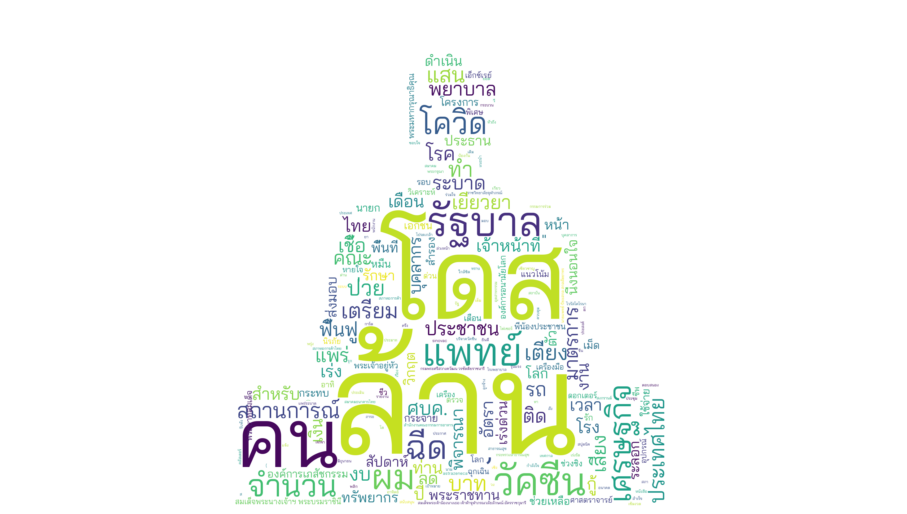

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.savefig('./images/output.png')